## Hi Marta! 
#### This is a quick script to show you how to pull data from nxcals using Swan. 
#### Before running the code make sure to select the 'star' symbol in the tab and select include 'nxcals' and 'sparcmetrics' options.

In [1]:
# some packages for visualisation
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/eos/home-i03/m/morwat/.local/lib/python3.9/site-packages/')

In [5]:
# import package to access Timber
import pytimber

# initialise the logging
ldb = pytimber.LoggingDB(spark_session=spark)

In [61]:
# you can pull data from a fill you are interested in
fill = 8634

# get the timestamps of different beam modes during chosen fill
fill_timestamps = ldb.get_lhc_fill_data(fill)
ffn = {item['mode']:item for item in fill_timestamps['beamModes']}

In [66]:
# define times of the mode you are interested in exploring
t1 = ffn['INJPHYS']['startTime']
t2 = ffn['INJPROB']['endTime']

In [67]:
print(t1, t2)

1682059470.477488 1682072342.149488


In [11]:
print(fill_timestamps)

{'fillNumber': 9843, 'startTime': 1719767988.667988, 'endTime': 1719792972.864238, 'beamModes': [{'mode': 'RAMPDOWN', 'startTime': 1719767988.667988, 'endTime': 1719769034.584863}, {'mode': 'SETUP', 'startTime': 1719769034.584863, 'endTime': 1719770250.848238}, {'mode': 'INJPROB', 'startTime': 1719770250.848238, 'endTime': 1719771211.312488}, {'mode': 'INJPHYS', 'startTime': 1719771211.312488, 'endTime': 1719773463.213238}, {'mode': 'PRERAMP', 'startTime': 1719773463.213238, 'endTime': 1719773679.582488}, {'mode': 'RAMP', 'startTime': 1719773679.582488, 'endTime': 1719774957.896863}, {'mode': 'FLATTOP', 'startTime': 1719774957.896863, 'endTime': 1719774973.188863}, {'mode': 'SQUEEZE', 'startTime': 1719774973.188863, 'endTime': 1719775526.397363}, {'mode': 'ADJUST', 'startTime': 1719775526.397363, 'endTime': 1719775928.613863}, {'mode': 'STABLE', 'startTime': 1719775928.613863, 'endTime': 1719792443.176363}, {'mode': 'BEAMDUMP', 'startTime': 1719792443.176363, 'endTime': 1719792446.0003

In [68]:
# load the variable you are interested in
BPM_varname_H = 'BFC.LHC:OrbitAcq:positionsH'
BPM_varname_V = 'BFC.LHC:OrbitAcq:positionsV'

BPM_pos_H = ldb.get(BPM_varname_H, t1, t2)
BPM_pos_V = ldb.get(BPM_varname_V, t1, t2)

In [35]:
BPM = ldb.get('BFC.LHC:Mappings:fBPMNames_h', t1, t2+10000)

In [73]:
for i in range(len(df.columns)):
    
    print(i, BPM['BFC.LHC:Mappings:fBPMNames_h'][1][0][i])

0 BPMSW.1R1.B1
1 BPMWF.A1R1.B1
2 BPMS.2R1.B1
3 BPMSY.4R1.B1
4 BPMWB.4R1.B1
5 BPMYA.4R1.B1
6 BPM.5R1.B1
7 BPMR.6R1.B1
8 BPMSX.7R1.B1
9 BPM_A.7R1.B1
10 BPM.8R1.B1
11 BPM.9R1.B1
12 BPM.10R1.B1
13 BPM.11R1.B1
14 BPM.12R1.B1
15 BPM.13R1.B1
16 BPM.14R1.B1
17 BPM.15R1.B1
18 BPM.16R1.B1
19 BPM.17R1.B1
20 BPM.18R1.B1
21 BPM.19R1.B1
22 BPM.20R1.B1
23 BPM.21R1.B1
24 BPM.22R1.B1
25 BPM.23R1.B1
26 BPM.24R1.B1
27 BPM.25R1.B1
28 BPM.26R1.B1
29 BPM.27R1.B1
30 BPM.28R1.B1
31 BPM.29R1.B1
32 BPM.30R1.B1
33 BPM.31R1.B1
34 BPM.32R1.B1
35 BPM.33R1.B1
36 BPM.34R1.B1
37 BPM.33L2.B1
38 BPM.32L2.B1
39 BPM.31L2.B1
40 BPM.30L2.B1
41 BPM.29L2.B1
42 BPM.28L2.B1
43 BPM.27L2.B1
44 BPM.26L2.B1
45 BPM.25L2.B1
46 BPM.24L2.B1
47 BPM.23L2.B1
48 BPM.22L2.B1
49 BPM.21L2.B1
50 BPM.20L2.B1
51 BPM.19L2.B1
52 BPM.18L2.B1
53 BPM.17L2.B1
54 BPM.16L2.B1
55 BPM.15L2.B1
56 BPM.14L2.B1
57 BPM.13L2.B1
58 BPM.12L2.B1
59 BPM.11L2.B1
60 BPM.10L2.B1
61 BPM.9L2.B1
62 BPM.8L2.B1
63 BPM.7L2.B1
64 BPMR.6L2.B1
65 BPMYB.5L2.B1
66 BPMYB.4L2.B1
6

In [69]:
# the first array is time, and the second is an array of arrays containing readings from different BPMs
t = BPM_pos_H['BFC.LHC:OrbitAcq:positionsH'][0]
BPM_readings_H = BPM_pos_H['BFC.LHC:OrbitAcq:positionsH'][1]

In [70]:
# let's turn the arrays into DataFrame so we can easily access it
df = pd.DataFrame(bpm for bpm in BPM_readings_H)

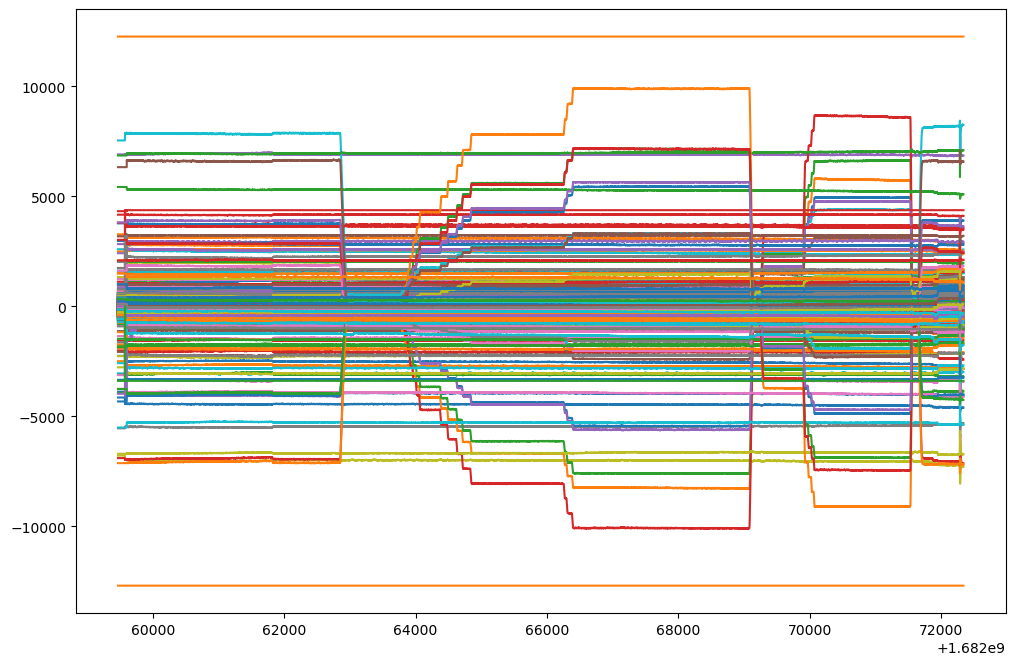

In [71]:
# now I am plotting all BPM readings in the same plot, but you can later on extract just the one you are interested in
plt.figure(figsize = (12,8), dpi = 100)

for i in range(len(df.columns)):
    plt.plot(t, df[i])
    
plt.show()

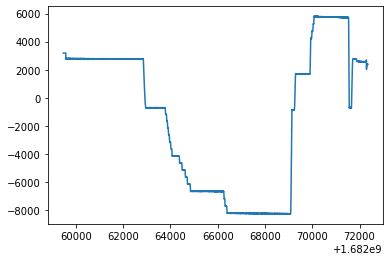

In [72]:
plt.plot(t, df[471])

In [31]:
len(df.columns)

1084